## Predictive modelling of customer bookings
In this project, we use a random forest to try to predict if a customer will buy a ticket based on some parameters, called features. We then evaluate the performance of the model and output visualisations.

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Prepare dataset for machine learning model.

In [40]:
mapping_days = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping_days)

mapping_sales_channel = {
    "Internet": 0,
    "Mobile": 1
}
df["sales_channel"] = df["sales_channel"].map(mapping_sales_channel)

mapping_trip_type = {
    "RoundTrip": 0,
    "CircleTrip": 1,
    "OneWay": 2
}
df["trip_type"] = df["trip_type"].map(mapping_trip_type)

route_arr = np.array([df["route"].unique()])[0]
mapping_route = {route_arr[i]:i for i in range(len(route_arr))}
df["route"] = df["route"].map(mapping_route)

origin_arr = np.array([df["booking_origin"].unique()])[0]
mapping_origin = {origin_arr[i]:i for i in range(len(origin_arr))}
df["booking_origin"] = df["booking_origin"].map(mapping_origin)

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,0,0,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,0,0,5.52,0
2,2,0,0,243,22,17,3,0,1,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,0,0,1,5.52,0
4,2,0,0,68,22,15,3,0,1,1,0,1,5.52,0


Now, implement a random forest and then evaluate its performance.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = df.iloc[:, 0:13] #features
y = df.iloc[:, 13] #target

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=17, test_size=0.2)

rf = RandomForestClassifier(n_estimators = 80)

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.8528

-Classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8518
           1       0.52      0.11      0.18      1482

    accuracy                           0.85     10000
   macro avg       0.69      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000



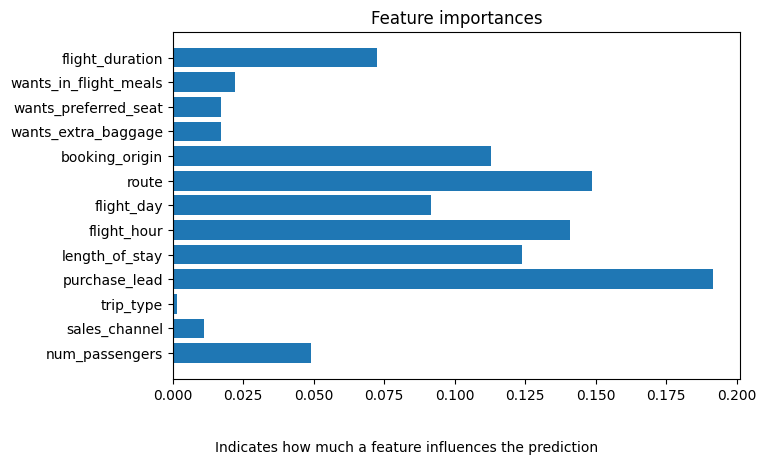

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = rf.predict(X_test)
cr = classification_report(y_test, y_pred)
print("-Classification report:")
print(cr)

features = pd.DataFrame(rf.feature_importances_, index = X.columns)
features_arr = np.array(features[0])
features_names = np.array(X.columns)
fig, ax = plt.subplots()
plt.title("Feature importances")
# ax.tick_params(labelsize=14)
ax.annotate("Indicates how much a feature influences the prediction", xy=(0.75,-0.2), xycoords="axes fraction", ha='right', va='center', fontsize=10)
fig.tight_layout()
pie = ax.barh(features_names, features_arr)
plt.show()